# Minimum spanning tree

Un árbol es una estructura que conecta todos los vértices sin crear ciclos. En esta ocasión, se busca el árbol cuyo peso sea el mínimo.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import pickle

Se utilizará el grafo de tiempo de viaje para el proceso.

In [2]:
time_data = pd.read_csv('time_matrix.csv')

Se crea una matriz de adyacencia para generar el grafo.

In [4]:
time_matrix = time_data.iloc[:,1:].values

In [5]:
time_graph = nx.DiGraph(time_matrix)

La opción por defecto de networkx no genera un MST para un grafo dirigido, así que se utiliza el algoritmo de Edmond.

In [6]:
MDST_time = nx.algorithms.tree.Edmonds(time_graph)

In [7]:
minimum_graph = MDST_time.find_optimum()

El algoritmo de Edmond arroja varios árboles para minimizar los pesos de las coneiones. Estos álbores pueden verse como rutas óptimas para distintas zonas de la ciudad.

In [11]:
with open('coordenadas_centros.pickle', 'rb') as handle:
    pos = pickle.load(handle)

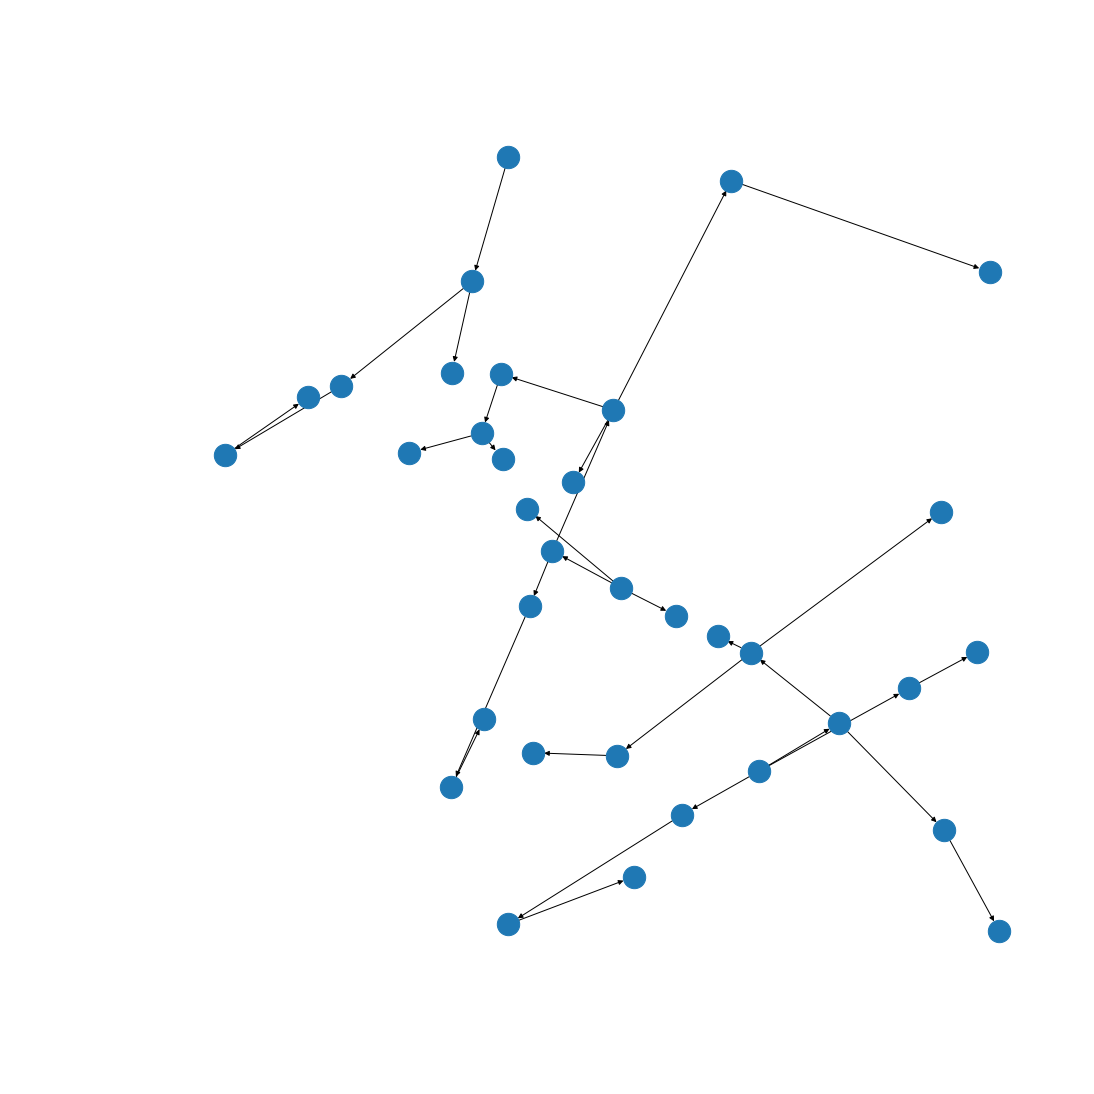

In [15]:
plt.figure(figsize=(15,15))
nx.draw(minimum_graph,
        pos,
        node_size=500,)

Estos nodos se pueden representar en el modelo original mediante color.

In [35]:
minimum_graph.edges

OutEdgeView([(0, 16), (2, 22), (2, 29), (3, 23), (5, 1), (6, 5), (6, 24), (7, 2), (7, 28), (7, 31), (8, 21), (10, 14), (10, 33), (11, 30), (15, 10), (16, 12), (16, 34), (17, 27), (18, 4), (20, 6), (20, 17), (20, 26), (22, 11), (24, 3), (24, 9), (24, 19), (25, 13), (26, 25), (29, 0), (29, 8), (29, 32), (33, 18)])

## Opción 2

Se puede utilizar Igraph para generar un MST que construya un único árbol. El grafo necesario se obtiene del grafo de networkx.

In [18]:
import igraph as ig

In [19]:
g = ig.Graph.from_networkx(time_graph)

In [20]:
MSP = g.spanning_tree()

La respuesta puede volver a convertirse en un grafo de networkx para lograr la visualización.

In [23]:
G = MSP.to_networkx()

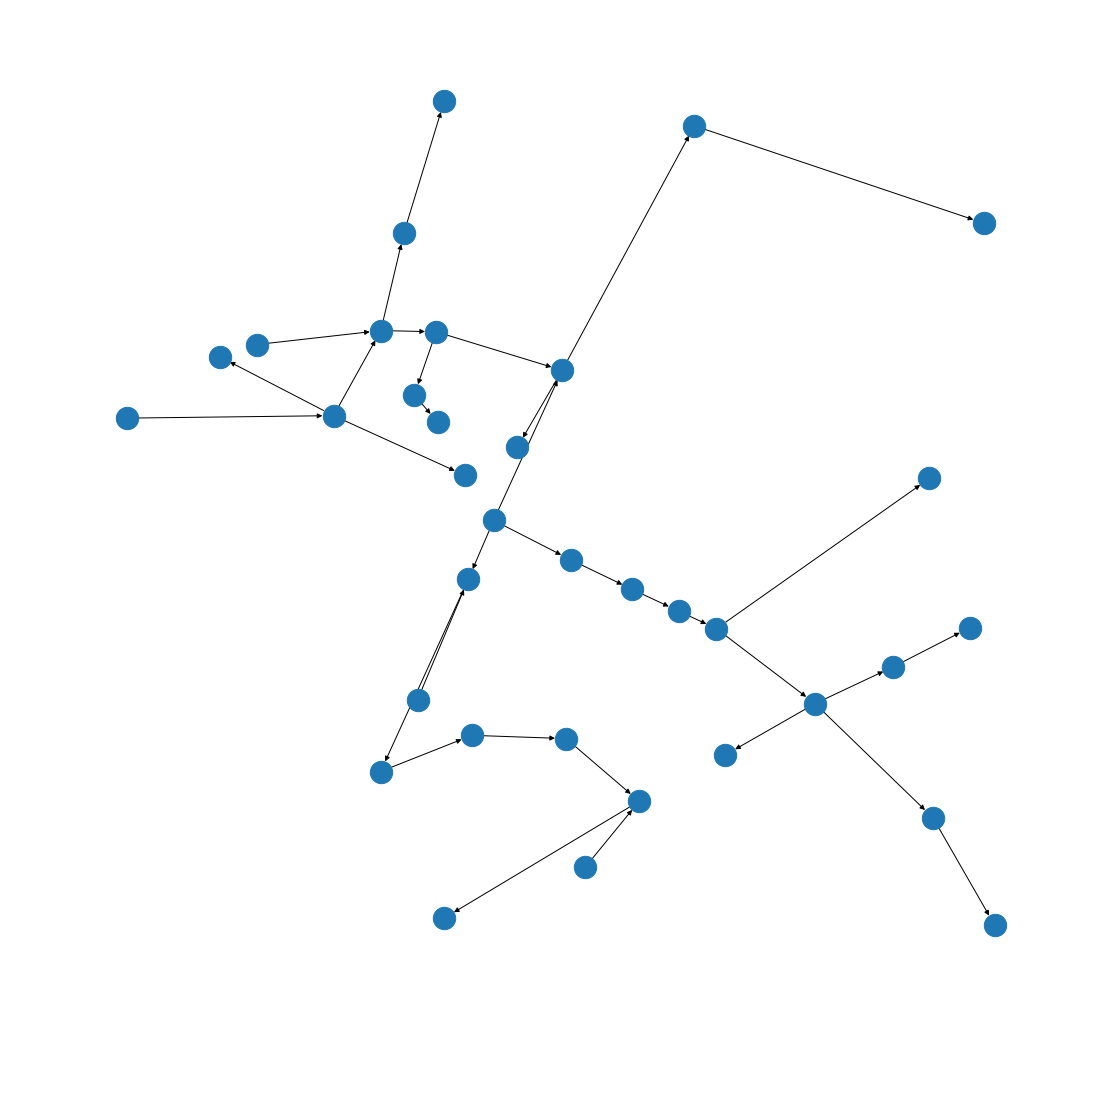

In [24]:
plt.figure(figsize=(15,15))

nx.draw(G,pos,
        node_size=500,)